## Lecture 2: A canonical Neo-classical growth model and introduction to value function iteration (VFI)

*Xing Xu, University of Minnesota, 2023 Summer*

### 2.1 A canonical Neo-classical growth model
#### 2.1.1 Environment
An economy is composed of 

* An infinitely lived representative household whose preferences are represented by a utility function $u(c) = \sum_{t=0}^\infty \beta^t u(c_t)$, where $\beta \in (0, 1)$ is the discount factor. The household inelastically supplies 1 unit of labor each period.
  
* A firm with technology $y_t = F(k_t, l_t)$. That is, for each period, firm transforms current capital stock and labor supply into $y_t$ units of goods.
  
* Standard law of motion for investment holds: $x_t = k_{t+1} - (1 - \delta) k_t$, where $\delta_t \in (0, 1]$ is the depreciation factor.
  
* The initial capital stock $k_0$ is given.

Therefore, total feasibility constraint for the economy is thus $c_t + x_t \leq F(k_t, l_t), \forall t$, which is equivalent to $c_t + k_{t+1} \leq F(k_t, l_t) + (1 - \delta) k_t, \forall t$. 

#### 2.1.2 Social Planner's problem
Under some assumptions, we can use the __social planner's problem__ to characterize the Pareto Optimal allocations ($l_t = 1$ substituted in):
\begin{align*}
    \max_{\{c_t, k_{t+1}\}_{t=0}^\infty} &\sum_{t=0}^\infty \beta^t u(c_t) \\
    \text{subject to } & c_t + k_{t+1} \leq F(k_t, 1) + (1 - \delta) k_t, \forall t\\
    c_t, k_{t+1} \geq 0, \forall t,  & \quad k_0 \text{ given }
\end{align*}

#### 2.1.3 Question: how to solve this?
For simplicity, let's assume utility is CRRA: $u(c_t) = \frac{c_t^{1 - \sigma}}{1 - \sigma}$ ($\sigma > 0, \sigma \neq 1$) and production function is Cobb-Douglas: $F(k_t, l_t) = A k_t^\alpha l_t^{1-\alpha}$. Now intuitively, we have a strictly concave function maximizing on a convex set, which should give unique solution to the maximization problem (not rigid). 

One attempt is to set up Lagrangian and take first order conditions (by Inada condition we know the solution is interior):
$$ 
\begin{cases}
\beta^t c_t^{-\sigma} = \lambda_t\\
\lambda_t = \lambda_{t+1}(A \alpha k_{t+1}^{\alpha - 1} + (1 - \delta) )\\
\end{cases}
$$

which gives the famous Euler Equation,
$$
c_t^{-\sigma} = \beta c_{t+1}^{-\sigma}(A \alpha k_{t+1}^{\alpha - 1} + (1 - \delta) )
$$

Assume there's a steady state where $c_t$ and $k_t$ converges to some constants $c_{ss}$ and $k_{ss}$, when $t$ is large enough. From the Euler equation, in steady state: 
$$
1 = \beta (A \alpha k_{ss}^{\alpha - 1} + (1 - \delta) )
$$

Side note: In a competitive equilibrium, this condition becomes $\beta R = 1$ or $R = \frac{1}{\beta}$, which is the equilibrium interest rate in a complete market. 


The Euler Equation characterizes the intertemporal optimality. Together with the feasiblity constraint (_and for technical reasons, a transversality condition_ $\lim_{t \to \infty} \lambda_t k_{t+1} = 0$), the equilibrium is characterized. We end up with infinite amount of unknowns $\{c_t, k_{t+1}\}_{t=0}^\infty$ and equal amounts of equations, which is troublesome to solve. This is why we turn to dynamic programming.

***
Now, denote the lifetime discounted utility of the social planner's problem given initial capital stock $k_0$ as $V(k_0)$, so 

\begin{align*}
    V(k_0) \equiv \max_{\{c_t, k_{t+1}\}_{t=0}^\infty} & \sum_{t=0}^\infty \beta^t u(c_t) \\
    \text{subject to } c_t + k_{t+1} &\leq F(k_t, 1) + (1 - \delta) k_t, \forall t\\
    c_t, k_{t+1} \geq 0, \forall t,  & \quad k_0 \text{ given }
\end{align*}

Let be maximizer be some feasible optimal plan $\{c_t, k_{t+1}\}_{t=0}^\infty$ such that $c_t + k_{t+1} \leq F(k_t, 1) + (1 - \delta) k_t, \forall t$ and $c_t, k_{t+1} \geq 0$.

Now let's turn to the recursive formulation of the problem. 

#### 2.2.1 Bellman's Equation
Under some conditions, the social planner's problem is equivalent to the following problem, which is in the form of a Bellman's Equation:

\begin{align*}
    V(k) = & \max_{c, k'} \{u(c) + \beta V(k') \}\\
    \text{subject to } & c + k' \leq F(k, 1) + (1 - \delta) k\\
    & c , k' \geq 0 
\end{align*}

We call $V$ as the value function. Under some conditions, the solution to this problem $c$ and $k'$ are functions of $k$, and are denoted as $g_c(k)$ and $g(k)$. From $k_0$, iteratively applying the policy function of capital, we obtain $k_1 = g(k_0)$, $k_2 = g(g(k_0))$, ..., which is the optimal plan of capital. Also iteratively applying the consumption policy function, $c_0 = g_c(k_0)$, $c_1 = g_c(k_1)$, .... Collecting the terms, we have constructed the optimal plan from $k_0$, $\{c_t, k_{t+1}\}_{t=0}^\infty$. 

Note that we have turned a infinite horizon problem into a single period problem. Equivalence between the recursive formulation with the social planner's problem is in the sense of $V(.)$ being the same function and the optimal plans generated from a same $k$ is the same. This is the Principle of Optimality. (SLP Theorem 4.2 to 4.5)

With the assumption that $u(.)$ is strictly increasing, for any $k$ and $k'$, $g_c(k) = F(k, 1) + (1 - \delta) k - k'$, substitute in, the problem becomes

$$
V(k) =  \max_{k' \in \Gamma(k)} \{u(F(k, 1) + (1 - \delta) k - k') + \beta V(k')\}
$$
where $\Gamma(k) \equiv [0, F(k, 1) + (1 - \delta) k]$

#### 2.2.2 Contraction mapping
Define a Bellman operator $T$ as follows,
$$
T(V)(k) = \max_{k' \in \Gamma(k)} \{u(F(k, 1) + (1 - \delta) k - k') + \beta V(k')\}
$$
The solution to the Bellman's equation is a fixed point such that $T(V^*) = V^*$. 

#### 2.2.3 Blackwell's sufficient condition 
$K \subset R^n$. The Bellman Operator $T$ maps $B(K) \to B(K)$, where $B(K)$ is the set of bounded functions $V: K \to R$. Suppose $T$ satisfies:
*  Monotonicity: if $W(k) \geq V(k)$, for all $k \in K$, where $V, W \in B(K)$, then $T(W)(k) \geq T(V)(k)$. 
*  Discounting: there exists $\beta, 1> \beta >0$, such that, $T(V+a)(k) \leq T(V)(k) + \beta a$ for all $V \in B(K), a \geq 0$ and $k \in K$.

Then $T$ is a contraction with modulus $\beta$. That is,  $|| T(V) - T(W) || \leq \beta ||V -W ||$. 

This implies that if we iteratively apply $T$ on $V$, the solution converges to the fixed point $V^*$. This process is known as value function iteration.

Sketch of proof: to show that in our environment $T$ maps a bounded function into a bounded function requires showing there is a maximum sustainable capital $\tilde{k}$ such that $\forall k > \tilde{k}, F(k, 1) < \delta k$. $\tilde{k}$ is given by $F(\tilde{k}, 1) = \delta \tilde{k}$ (why?). Then it is easy to show that Monotonicity and Discounting hold. (equivalently one can use SLP Theorem 4.6)



Now before coding it, initialize an environment.

In [1]:
import Pkg
Pkg.activate(@__DIR__)  # Activate a local environment 
Pkg.add("LinearAlgebra")


  Activating project at `~/Documents/Teaching/Julia course 2023 Summer`
    Updating registry at `~/.julia/registries/General.toml`
┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 28, "Connection timed out after 30001 milliseconds", Downloads.Response("https", "https://cn-east.pkg.juliacn.com/registries", 301, "HTTP/2 301", ["server" => "Varnish", "retry-after" => "0", "location" => "https://cn-east.pkg.juliacn.com/registries", "x-geo-continent" => "AS", "x-geo-country" => "CN", "x-geo-region" => "SH", "accept-ranges" => "bytes", "date" => "Sat, 08 Jul 2023 01:25:03 GMT", "via" => "1.1 varnish", "x-served-by" => "cache-nrt-rjtf7700060-NRT", "x-cache" => "HIT", "x-cache-hits" => "0", "x-timer" => "S1688779504.582469,VS0,VE0", "content-length" => "0"]))
└ @ Pkg.Registry /Users/sabae/src/julia/usr/share/julia/stdlib/v1.7/Pkg/src/Registry/Registry.jl:82
   Resolving package versions...
  No Ch

In [12]:
using LinearAlgebra

### 2.3 Introduction to value function iteration (VFI)
Finally we get to business. First we need to specify a set of parameters.

Let household has CRRA utility with $\sigma = 2$ and $\beta = 0.9$. Firm has Cobb-Douglas utility with $A = 2$, $\alpha = 0.7$. $\delta = 0.9$. 

##### 2.3.1 VFI: A first attempt (bad practice: inefficient and  poorly written)
 Let's first just go with instinct. Set up the problem with the parameters and solve it. If you have experience with this, you might find the codes a little Matlab or c++ styled. We will turn to more Julia styled codes later.
 
 First, specify parameters:

In [11]:
σ = 2.0 #make it float to keep consistent with other variables
β = 0.9
A = 2.0
α = 0.7
δ = 0.9

0.9

Initialize grid of $v$. Let there be 100 grids. 

In [13]:
N = 100 # number of grids
v = zeros(N) #initial guess of value function v(k), here just 0.0 for any k

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Now we want to create grids for $k$ and $k'$. To do this, we need the maximum sustainable capital. Note that $\tilde{k}$ can be solved from $F(\tilde{k}, 1) = \delta \tilde{k}$, which is $A \tilde{k}^\alpha = \delta \tilde{k}$. Since $\delta > 0$, $\tilde{k} = (\frac{A}{\delta})^{\frac{1}{1 - \alpha}}$.

In [14]:
k_tilde = (A / δ)^(1 / (1 - α))
k = range(0.01, k_tilde, N) #Note that the grids for k' is same as k
# start with 0.01 as for k = 0, consumption will always be 0

0.01:0.14455054028788528:14.320503488500643

Now let's perform VFI. I wrap VFI into a function, which takes in the parameters and spits out the value function and policy function.

 I set a small enough tolerance of error so that the value function is considered as converged when the maximum absolute difference between each iteration is below the critical tolerance (here $10^{-6}$). In addition, I set a maximum iteration 1000 so that it will terminate even if it does not converge. 

In [15]:
# VFI (bad practice)
function VFI_baseline(σ, β, A, α, δ, v, k)
    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function

    iterate = 0 # keep track of how many iterations we have run
    tol = 1e-6 # the critical tolerance
    
    while true # the code keeps iterating itself until we manually break it
        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv
        
        # outer loop over each grid of v
        for i in eachindex(v) # iterate over value function
            pol_i = 1
            just_started = true  # will be used later to store v with choosing k'= 0
            vmax = zero(eltype(v)) # will be used later to store the maximized v

            # most inner loop over potential k'
            for j in eachindex(k) 
                c = A * k[i]^α + (1 - δ) * k[i] - k[j] # this is the consumption if we choose k' = k[j]
                if c >= 0.0 # make sure consumption is nonnegative
                    v_tmp = c^(1 - σ) / (1 - σ) + β * v[j] #v if choosing k' = k[j]
                    if just_started # logic operation 
                        vmax = v_tmp # store the value function
                        pol_i = j # store the policy function (an index on k)
                        just_started = false
                    elseif v_tmp > vmax 
                        pol_i = j
                        vmax = v_tmp
                end
            end
        
            v1[i] = vmax #update maximized value
            pol[i] = pol_i #update policy function
            if distance < abs(vmax - v[i])
                distance = abs(vmax - v[i]) #update distance
            end
        end

        (distance < tol || iterate == 1000) && break # break out the whole loop if one of the statements are true
        iterate += 1
        v.= v1# update the value, equivalently v = copy(v1)
    end
    return (v=v, pol=pol, iterate=iterate)
end

VFI_baseline (generic function with 1 method)

In [22]:
(v, pol, iterate) =  VFI_baseline(σ, β, A, α, δ, v, k)


(v = [-141.6000605365398, -13.98208195706137, -11.222006674686714, -9.97467946907761, -9.194802019095095, -8.641506656983273, -8.236059375878538, -7.918719621073968, -7.662167409250431, -7.446410754534364  …  -4.775705127339619, -4.7678914912950106, -4.760029024037419, -4.752245655402492, -4.744586503571926, -4.736843187659619, -4.7292611942669005, -4.721836140169183, -4.714354354769835, -4.707224761555834], pol = [1, 3, 4, 5, 6, 8, 9, 10, 11, 12  …  68, 68, 69, 70, 71, 71, 72, 72, 73, 73], iterate = 157)

In [8]:
println("The value function converged in $iterate loops")

The value function converged in 157 loops


Let's see how the value function and the policy function look like. For this purpose, we need an additional package. 

In [6]:
Pkg.add("Plots") # This takes a while

   Resolving package versions...
  No Changes to `~/Documents/Teaching/Julia course 2023 Summer/Project.toml`
  No Changes to `~/Documents/Teaching/Julia course 2023 Summer/Manifest.toml`


In [21]:
using Plots # this also might take some time

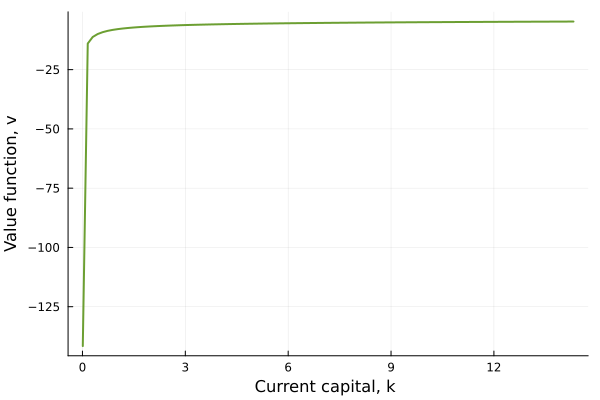

In [22]:
function v_plot(k, v)
    Plots.plot(k, v, primary=false, xlabel = "Current capital, k ", ylabel = "Value function, v", linewidth= 2)
end

v_plot(k, v)

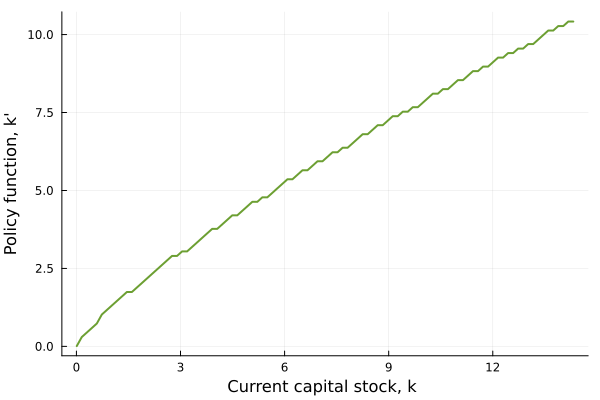

In [23]:
function pol_plot(k, pol) 
    Plots.plot(k, k[pol], primary=false, xlabel = "Current capital stock, k ", ylabel = "Policy function, k'", linewidth= 2)
end
pol_plot(k, pol) 

Note that both the value function and the policy function are strictly increasing in k. For a proof, the former directly comes from SLP Theorem 4.7. The latter can be induced together with SLP Theorem 4.8.

##### 2.3.2 Improving the code towards elegance

The code above works fine if you are using matlab (with slight adjustment). To make it better, the first thing you want to take use of is the strong functional operations on Julia. You can invoke pre-defined functions within functions.

Define the utility function and production function each with one line. 

In [23]:
u(c) = c^(1 - σ)/(1 - σ)
F(k) = A * k^α

F (generic function with 1 method)

Make the functions as inputs to the VFI. 

Also I made a minor change so that v and k are generated within the function defined, which is generally considered as good practice.

In [25]:
# VFI (still bad practice)
function VFI_baseline_v2(σ, β, A, α, δ, N)
    # Generate v and k
    v = zeros(N) #initial guess of value function v(k), here just 0.0 for any k
    k_tilde = (A / δ)^(1 / (1 - α))
    k = range(0.01, k_tilde, N) #Note that the grids for k' is same as k

    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function

    iterate = 0 # keep track of how many iterations we have run
    tol = 1e-6 # the critical tolerance
    
    while true # the code keeps iterating itself until we manualy break it
        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv
        
        # outer loop over each grid of v
        for i in eachindex(v) # iterate over value function
            pol_i = 1
            just_started = true  # will be used later to store v with choosing k'= 0
            vmax = zero(eltype(v)) # will be used later to store the maximized v

            # most inner loop over potential k'
            for j in eachindex(k) 
                c = F(k[i]) + (1 - δ) * k[i] - k[j] # this is the consumption if we choose k' = k[j]
                if c >= 0.0 # make sure consumption is nonnegative
                    v_tmp = u(c) + β * v[j] #v if choosing k' = k[j]
                    if just_started # logic operation 
                        vmax = v_tmp # store the value function
                        pol_i = j # store the policy function (an index on k)
                        just_started = false
                    elseif v_tmp > vmax 
                        pol_i = j
                        vmax = v_tmp
                end
            end
        
            v1[i] = vmax #update maximized value
            pol[i] = pol_i #update policy function
            if distance < abs(vmax - v[i])
                distance = abs(vmax - v[i]) #update distance
            end
        end

        (distance < tol || iterate == 1000) && break # break out the whole loop if one of the statements are true
        iterate += 1
        v.= v1# update the value, equivalently v = copy(v1)
    end
    return (v=v, pol=pol, iterate=iterate)
end

VFI_baseline_v2 (generic function with 1 method)

In [29]:
(v, pol, iterate) =  VFI_baseline_v2(σ, β, A, α, δ, 100)

(v = [-141.6000605365398, -13.98208195706137, -11.222006674686714, -9.97467946907761, -9.194802019095095, -8.641506656983273, -8.236059375878538, -7.918719621073968, -7.662167409250431, -7.446410754534364  …  -4.775705127339619, -4.7678914912950106, -4.760029024037419, -4.752245655402492, -4.744586503571926, -4.736843187659619, -4.7292611942669005, -4.721836140169183, -4.714354354769835, -4.707224761555834], pol = [1, 3, 4, 5, 6, 8, 9, 10, 11, 12  …  68, 68, 69, 70, 71, 71, 72, 72, 73, 73], iterate = 157)

In [30]:
println("The value function converged in $iterate loops")

The value function converged in 157 loops


We can do even better. Functions in Julia allow pre-specified values for some inputs (it uses the default value unless otherwise specified). Note that not only we can pre-specify parameters, but we can also pre-specify the grids (vectors).Note that this only helps to make the code look nicer and you don't need to carry around something you don't change a lot.

In [8]:
# VFI (Acceptable practice)
function VFI_baseline_v3(σ, β, A, α, δ; N = 100, tol = 1e-6 , v = zeros(N), k = range(0.01, (A / δ)^(1 / (1 - α)), N))
    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function

    iterate = 0 # keep track of how many iterations we have run
    
    while true # the code keeps iterating itself until we manually break it
        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv
        
        # outer loop over each grid of v
        for i in eachindex(v) # iterate over value function
            pol_i = 1
            just_started = true  # will be used later to store v with choosing k'= 0
            vmax = zero(eltype(v)) # will be used later to store the maximized v

            # most inner loop over potential k'
            for j in eachindex(k) 
                c = F(k[i]) + (1 - δ) * k[i] - k[j] # this is the consumption if we choose k' = k[j]
                if c >= 0.0 # make sure consumption is nonnegative
                    v_tmp = u(c) + β * v[j] #v if choosing k' = k[j]
                    if just_started # logic operation 
                        vmax = v_tmp # store the value function
                        pol_i = j # store the policy function (an index on k)
                        just_started = false
                    elseif v_tmp > vmax 
                        pol_i = j
                        vmax = v_tmp
                end
            end
        
            v1[i] = vmax #update maximized value
            pol[i] = pol_i #update policy function
            if distance < abs(vmax - v[i])
                distance = abs(vmax - v[i]) #update distance
            end
        end

        (distance < tol || iterate == 1000) && break # break out the whole loop if one of the statements are true
        iterate += 1
        v.= v1# update the value, equivalently v = copy(v1)
    end
    return (v=v, pol=pol, iterate=iterate)
end

VFI_baseline_v3 (generic function with 1 method)

In [9]:
VFI_baseline_v3(σ, β, A, α, δ)

(v = [-141.6000605365398, -13.98208195706137, -11.222006674686714, -9.97467946907761, -9.194802019095095, -8.641506656983273, -8.236059375878538, -7.918719621073968, -7.662167409250431, -7.446410754534364  …  -4.775705127339619, -4.7678914912950106, -4.760029024037419, -4.752245655402492, -4.744586503571926, -4.736843187659619, -4.7292611942669005, -4.721836140169183, -4.714354354769835, -4.707224761555834], pol = [1, 3, 4, 5, 6, 8, 9, 10, 11, 12  …  68, 68, 69, 70, 71, 71, 72, 72, 73, 73], iterate = 157)

One more slight modification is to use struct. If you have experience with c++, this basically works in the same way as classes in c++. 

In [24]:
Base.@kwdef struct Household # or simply @kwdef
    σ :: Float64 = 2.0
    β :: Float64 = 0.9
    A :: Float64 = 2.0
    α :: Float64 = 0.7
    δ :: Float64 = 0.9
end

h = Household() 
# to modify some of the inputs, say σ to 4.0, simply let h = Household(σ = 4.0)

Household(2.0, 0.9, 2.0, 0.7, 0.9)

First, we need to make some slight modifications on the function for utility and production so that it works with our struct. Here, `m` refers to the struct and `m.` refers to whatever parameter in m.

In [25]:
u1(c, m) = c^(1 - m.σ)/(1 - m.σ)
F1(k, m) = m.A * k^m.α

F1 (generic function with 1 method)

Then, for VFI, we can suppress all inputs into one.

In [26]:
# VFI (Better practice)
function VFI_baseline_v4(h; N = 100, tol = 1e-6 , v = zeros(N), k = range(0.01, (h.A / h.δ)^(1 / (1 - h.α)), N))
    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function
    
    iterate = 0 # keep track of how many iterations we have run
    
    while true # the code keeps iterating itself until we manually break it

        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv
        
        # outer loop over each grid of v
        for i in eachindex(v) # iterate over value function
            pol_i = 1
            just_started = true  # will be used later to store v with choosing k'= 0
            vmax = zero(eltype(v)) # will be used later to store the maximized v

            # most inner loop over potential k'
            for j in eachindex(k) 
                c = F1(k[i], h) + (1 - h.δ) * k[i] - k[j] # this is the consumption if we choose k' = k[j]
                if c >= 0.0 # make sure consumption is nonnegative
                    v_tmp = u1(c,h) + h.β * v[j] #v if choosing k' = k[j]
                    if just_started # logic operation 
                        vmax = v_tmp # store the value function
                        pol_i = j # store the policy function (an index on k)
                        just_started = false
                    elseif v_tmp > vmax 
                        pol_i = j
                        vmax = v_tmp
                end
            end
        
            v1[i] = vmax #update maximized value
            pol[i] = pol_i #update policy function
            if distance < abs(vmax - v[i])
                distance = abs(vmax - v[i]) #update distance
            end
        end

        (distance < tol || iterate == 1000) && break # break out the whole loop if one of the statements are true
        iterate += 1
        v.= v1# update the value, equivalently v = copy(v1)
    end
    return (v=v, pol=pol, iterate=iterate)
end

VFI_baseline_v4 (generic function with 1 method)

In [27]:
VFI_baseline_v4(h)

(v = [-141.6000605365398, -13.98208195706137, -11.222006674686714, -9.97467946907761, -9.194802019095095, -8.641506656983273, -8.236059375878538, -7.918719621073968, -7.662167409250431, -7.446410754534364  …  -4.775705127339619, -4.7678914912950106, -4.760029024037419, -4.752245655402492, -4.744586503571926, -4.736843187659619, -4.7292611942669005, -4.721836140169183, -4.714354354769835, -4.707224761555834], pol = [1, 3, 4, 5, 6, 8, 9, 10, 11, 12  …  68, 68, 69, 70, 71, 71, 72, 72, 73, 73], iterate = 157)

There are many advantages with using struct:

* It is very clean.
* There are no global variables stored. Using local variables whenever possible prevents you away from a lot of mistakes and bugs.
* Using struct keeps the input intact. A typical thing that happens when working with a big project is that we often need to modify the inputs to some functions we wrote (say we want to also include a tax on capital rental income). If you applied this functions around in your code, with struct you don't need to modify every single one of them. 
* It avoids some often unnoticed mistakes like messing up the order of your inputs.
* It is easy to modify (as the comment before).

One potential disadvantage is that it is slightly slower (really small difference), but most of the time this tiny difference of speed doesn't matter.

##### 2.3.3 Improving the code towards speed

For the purpose of the code, it is already fast enough so we don't really have incentive to make adjustments for speed. However, for projects that are more computationally heavy, this section is to give a glimpse for the potential ways to boost efficiency of the code.

Piece of advice to keep in mind: a large fractions of tricks or methodologies to increase speed are at the cost of the clarity of the code. The golden rule is to only consider speed up to the point you need for the particular project. Correctness and clarity are always of greater priority.

Here I introduce two tricks that provides significant gain in speed and still preserves the clarity in code. To make comparisons between the original code, from now on I make the number of grids N bigger (1000).

In [28]:
# speed of the original code
@time begin
# Speed of the original code
    v4, = VFI_baseline_v4(h; N= 1000) #Only get out v
end

  1.477253 seconds (22.99 k allocations: 1.358 MiB, 0.58% compilation time)


(v = [-43.72028630185341, -28.841363390515816, -23.574176627043187, -20.68493421026871, -18.811137873668766, -17.470185034668205, -16.429607986655366, -15.615620425521886, -14.936554411075287, -14.374732380493473  …  -4.711108839962214, -4.710391274429081, -4.709675908528837, -4.708961199547117, -4.708246173882994, -4.707531410095677, -4.706818288630849, -4.706109231525942, -4.705398964856121, -4.704688876268555], pol = [2, 4, 6, 8, 10, 11, 13, 15, 16, 18  …  727, 727, 728, 728, 729, 730, 730, 730, 731, 732], iterate = 128)

##### 2.3.3.1 A trick within the loop

Here comes the magic. Try to find the difference between the codes (v5 and v4) by yourself.

In [13]:
# VFI (Better practice)
function VFI_baseline_v5(h; N = 100, tol = 1e-6 , v = zeros(N), k = range(0.01, (h.A / h.δ)^(1 / (1 - h.α)), N))
    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function
    iterate = 0 # keep track of how many iterations we have run
    
    while true # the code keeps iterating itself until we manually break it
        
        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv
        pol_i = 1

        # outer loop over each grid of v
        for i in eachindex(v) # iterate over value function
            just_started = true  # will be used later to store v with choosing k'= 0
            vmax = zero(eltype(v)) # will be used later to store the maximized v

            # most inner loop over potential k'

            ###################### Here ###########################
            for j in pol_i:N  
            ###################### Here ###########################
                c = F1(k[i], h) + (1 - h.δ) * k[i] - k[j] # this is the consumption if we choose k' = k[j]
                if c >= 0.0 # make sure consumption is nonnegative
                    v_tmp = u1(c,h) + h.β * v[j] #v if choosing k' = k[j]
                    if just_started # logic operation 
                        vmax = v_tmp # store the value function
                        pol_i = j # store the policy function (an index on k)
                        just_started = false
                    elseif v_tmp > vmax 
                        pol_i = j
                        vmax = v_tmp
                    ###################### Here ###########################
                    else
                        break #only break out of the most inner loop
                    end
                    ###################### Here ###########################
                end
            end
        
            v1[i] = vmax #update maximized value
            pol[i] = pol_i #update policy function
            if distance < abs(vmax - v[i])
                distance = abs(vmax - v[i]) #update distance
            end
        end

        (distance < tol || iterate == 1000) && break # break out the whole loop if one of the statements are true
        iterate += 1
        v.= v1# update the value, equivalently v = copy(v1)
    end
    return (v=v, pol=pol, iterate=iterate)
end

VFI_baseline_v5 (generic function with 1 method)

In [14]:
@time begin
    v5, = VFI_baseline_v5(h; N= 1000)
end

  0.117555 seconds (387.57 k allocations: 20.175 MiB, 3.67% gc time, 88.93% compilation time)


(v = [-43.72028630185341, -28.841363390515816, -23.574176627043187, -20.68493421026871, -18.811137873668766, -17.470185034668205, -16.429607986655366, -15.615620425521886, -14.936554411075287, -14.374732380493473  …  -4.711108839962214, -4.710391274429081, -4.709675908528837, -4.708961199547117, -4.708246173882994, -4.707531410095677, -4.706818288630849, -4.706109231525942, -4.705398964856121, -4.704688876268555], pol = [2, 4, 6, 8, 10, 11, 13, 15, 16, 18  …  727, 727, 728, 728, 729, 730, 730, 730, 731, 732], iterate = 128)

In [40]:
# Check that they do yield same value function (use approximately equal as floats can sometimes have some random minor differences)
v4 ≈ v5

true

In [36]:
# the time difference
1.478666/0.040479

36.52921267817881

The code is absurdly 36.5 times faster (would be even larger difference if N is larger). 

What happened?

***First modification:*** Note that before when I was iterating k' I used

``` for j in eachindex(k) ```,

which, in this environment is equivalent to 

``` for j in 1:N ```.

However, now the code writes

``` for j in pol_i:N ```. 

Instead of the beginning, I start from the policy function of the last i. Why doing this still yield the same result? It is due to strictly increasing policy function. If $g(k[i]) = k$[pol_i], then $g(k[i + 1]) ≥  k$[pol_i], so we can start from the previous policy. This is a huge gain of efficiency.

***Second modification:***

From the graph of the value function, you see that it is strictly concave in $k$. This means that when I update my guess of $V(k)$ when searching monotonically along $k'$, I can stop when the RHS of Bellman equation starts dropping.

This is what 

``` else \\ break #only break out of the most inner loop end ```

does.

#### 2.4 Vectorization

Julia is a language written in vector operations. Vectorization is in a lot of cases preferred for efficiency. For most dynamic programming problems with uncertainties (we will see in next couple lectures), vectorization is desirable and should be how the code will look like in the end. However in our simple example here, as you will see, without modifications, vectorization performs worse than loops, but it is a useful tool that one should keep in mind.

Why don't we always start with vectorization? Vectorization requires full restructuring of the algorithm and in most cases is more elegant but less straightforward than simple loops. Remember that a nice-looking but wrong code has zero value. Thus, in practice, you should start with the loop version (as we did) and make sure you fully understand it, before going to vectorization.

For the purpose here, let's do step by step. First, we will vectorize the inner loop. That is, fix k and find k' that maximize the RHS of the Bellman equation.

In [4]:
using LinearAlgebra

##### 2.4.1 Vectorizing the inner loop

##### 2.4.1.1 Quick introduction to broadcasting

In Julia, the tool that comes very handy for vectorization is the simple ".". The dot broadcasts the operation you want to perform on each element of an array (or a matrix). Say x is an array and you want to add 2 to every element of x. You probably want to do the following:

In [25]:
x = [2, 2] #some random array
x + 2

MethodError: MethodError: no method matching +(::Vector{Int64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/operators.jl:655
  +(!Matched::T, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/int.jl:87
  +(!Matched::Rational, ::Integer) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/rational.jl:311
  ...

An error message arises and it is kind enough to remind you that you should instead do this:

In [26]:
x = [2, 2] #some random array
x .+ 2

2-element Vector{Int64}:
 4
 4

which gives the correct result. The takeaway is to always use "." for any elementwise operation. 

An exception is for multipilcations. We can perform elementwise multipilcation without specification, i.e.

In [15]:
x = [2, 2] #some random array
2 * x

2-element Vector{Int64}:
 4
 4

Note that it also works with functions. f.(x) broadcasts f onto an array x. 

In [17]:
f(y) = 3*y

f.(x)

2-element Vector{Int64}:
 6
 6

Here we want to broadcast utility function onto all nonnegative consumptions. Note that `u1(c, m) = c^(1 - m.σ)/(1 - m.σ)`. With the first entry being the array that we want to broadcast on, we want to fix the second entry m so that the broadcast is correct. 

The code we need to use is then `u1.(c[mask], Ref(h))` instead of `u1.(c[mask], h)`, where the `Ref(h)` syntax is used to create a reference to the h struct, which allows us to broadcast the function properly.

##### 2.4.1.2 Back to business

One more thing to note is that v_tmp is now an array. I initialize it to be -Inf and only change the entries with positive consumptions. This guarantees that our optimization is correct.

Now I provide the code for vectorization of the inner loop. Note that we can no longer apply the trick as before because with every k, we will have a different dimension of k', which will break the vectorization.

In [25]:
# VFI (Partially vectorized version)
function VFI_baseline_vectorized(h; N=100, tol=1e-6, v=zeros(N), k=range(0.01, (h.A / h.δ)^(1 / (1 - h.α)), N))
    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function
    iterate = 0 # keep track of how many iterations we have run
    v_tmp = similar(v) # will be used for calculating maximized value function for each i
    c = similar(v) # preallocate space for c
    mask = similar(c, Int) # preallocate space for the indicator for non-negativity

    while true # the code keeps iterating itself until we manually break it
        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv

        # outer loop over each grid of v
        for i in eachindex(v) # iterate over value function
            pol_i = 1
            vmax = zero(eltype(v)) # will be used later to store the maximized v

            # calculate consumption and value for all potential k' simultaneously
            c = F1(k[i], h) .+ (1 - h.δ) * k[i] .- k # consumption for all potential k'
            mask = (c .>= 0.0) # create an index for nonnegative consumptions

            # Calculate temporary value for all potential k' simultaneously
            v_tmp .= -Inf # Initialize v_tmp with -Inf for all elements
            v_tmp[mask] .= u1.(c[mask], Ref(h)) .+ h.β .* v[mask] # Assign temporary value for elements with positive consumption

            # Find the maximum value and corresponding policy index
            vmax, pol_i = findmax(v_tmp, dims=1)

            # Update v1 and pol arrays using the maximum value and policy index
            v1[i] = vmax[1]
            pol[i] = pol_i[1]
            if distance < abs(vmax[1] - v[i])
                distance = abs(vmax[1] - v[i]) # update distance
            end
        end

        (distance < tol || iterate == 1000) && break # break out of the whole loop if one of the statements is true
        iterate += 1
        v .= v1 # update the value using element-wise assignment
    end
    return (v=v, pol=pol, iterate=iterate)
end

VFI_baseline_vectorized (generic function with 1 method)

In [27]:
@time begin
    v6, = VFI_baseline_vectorized(h; N = 1000)
end

  1.859108 seconds (1.16 M allocations: 3.258 GiB, 11.15% gc time)


(v = [-43.72028630185341, -28.841363390515816, -23.574176627043187, -20.68493421026871, -18.811137873668766, -17.470185034668205, -16.429607986655366, -15.615620425521886, -14.936554411075287, -14.374732380493473  …  -4.711108839962214, -4.710391274429081, -4.709675908528837, -4.708961199547117, -4.708246173882994, -4.707531410095677, -4.706818288630849, -4.706109231525942, -4.705398964856121, -4.704688876268555], pol = [2, 4, 6, 8, 10, 11, 13, 15, 16, 18  …  727, 727, 728, 728, 729, 730, 730, 730, 731, 732], iterate = 128)

Check whether the result is correct.

In [31]:
v6 ≈ v5

true

##### 2.4.2 Fully vectorized VFI

If you are a "for loop" hater, then the following code will sing to you. It is very elegant and used a bunch of cool built-in functions along the way.

In [20]:
# VFI (Fully vectorized version)
function VFI_baseline_full_vec(h; N=100, tol=1e-6, v=zeros(N), k=range(0.01, (h.A / h.δ)^(1 / (1 - h.α)), N))
    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function
    iterate = 0 # keep track of how many iterations we have run
    c = similar(v, (N,N)) # preallocate space for c
    v_tmp = similar(c) # will be used for calculating maximized value function for all i
    mask = similar(c, Int) # preallocate space for the indicator for non-negativity

    while true # the code keeps iterating itself until we manually break it
        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv

        # calculate consumption and value for all combinations of k and k' simultaneously
        c = F1.(k, Ref(h)) .+ (1 - h.δ) .* k .- k' # consumption for all combinations of k and k'
        mask = (c .>= 0.0) # create an index for nonnegative consumptions

        # Calculate temporary value for all combinations of k and k' simultaneously
        v_tmp .= -Inf # Initialize v_tmp with -Inf for all elements
        v_tmp[mask] .= u1.(c[mask], Ref(h)) .+ h.β .* (repeat(v, outer = [1,N]))'[mask] # Assign temporary value for elements with positive consumption

        # Find the maximum value and corresponding policy index along rows
        vmax, pol_i = findmax(v_tmp, dims=2)

        # Update v1 and pol arrays using the maximum value and policy index
        v1 .= vmax[:, 1]
        pol .= getindex.(pol_i[:, 1], 2)
        distance = maximum(abs.(vmax[:, 1] .- v)) # update distance

        (distance < tol || iterate == 1000) && break # break out of the whole loop if one of the statements is true
        iterate += 1

        # Vectorized update of v using element-wise assignment
        v .= v1
    end
    return (v=v, pol=pol, iterate=iterate)
end


VFI_baseline_full_vec (generic function with 1 method)

In [22]:
@time begin
    v7, = VFI_baseline_full_vec(h; N=1000)
end

  3.491191 seconds (6.08 k allocations: 3.639 GiB, 6.69% gc time)


(v = [-43.72028630185341, -28.841363390515816, -23.574176627043187, -20.684934210268707, -18.811137873668766, -17.470185034668205, -16.429607986655366, -15.615620425521886, -14.936554411075287, -14.374732380493473  …  -4.711108839962214, -4.710391274429081, -4.709675908528837, -4.708961199547117, -4.708246173882994, -4.707531410095677, -4.706818288630849, -4.706109231525942, -4.705398964856121, -4.704688876268555], pol = [2, 4, 6, 8, 10, 11, 13, 15, 16, 18  …  727, 727, 728, 728, 729, 730, 730, 730, 731, 732], iterate = 128)

Check if the result is correct.

In [32]:
v7 ≈ v6

true

##### 2.4.3 Why in this case vectorization is slightly slower?

Chat GPT has a wonderful explanation:

"The vectorized version of the code is slower compared to the original loop version for a few reasons:

* Memory usage: The vectorized version uses additional memory to store intermediate arrays, such as c and v_tmp, which can lead to increased memory usage and slower performance. This is especially true if the grid size N is large.

* Array broadcasting: Broadcasting operations (.) in Julia can sometimes be less efficient compared to explicit loops, especially when dealing with large arrays. Broadcasting can result in unnecessary memory allocations and temporary arrays.

* Cache efficiency: The vectorized version might not take advantage of CPU cache efficiency as effectively as the loop version. In the loop version, the calculations are done sequentially, which can utilize the CPU cache more efficiently. The vectorized version performs calculations across multiple elements simultaneously, which can lead to cache misses."

Another reason unmentioned by GPT is that loops on Julia are very fast if written properly. If you are solving the same problem with loops on Python, you will find it to be much slower than what we managed to do. On the other side, there are a lot that can be done to speed up the vectorized version of the code above. With appropriate adjustments, the code can have similar, if not better performance than the loop version, which is something to keep in mind for an actual project. 

For example, there's one trick we can apply on the last part. Note that we can pre-compute all consumption as for each k and k', consumption are fixed. This can also be done with the loop version but is much more convenient with vectorized VFI.

##### 2.4.4 Example for optimizing VFI with vectorization

This also works like magic. I just pulled a couple lines outside the loop but the efficiency rocketed.

In [15]:
# VFI (Fully vectorized version with c computed outside the loop)
function VFI_baseline_full_vec_pre_c(h; N=100, tol=1e-6, v=zeros(N), k=range(0.01, (h.A / h.δ)^(1 / (1 - h.α)), N))
    pol = similar(v, Int) # will be used for storing the policy function (k'), as an index
    v1 = similar(v) # will be used for storing updated value function
    iterate = 0 # keep track of how many iterations we have run
    # calculate consumption and value for all combinations of k and k' simultaneously
    c = F1.(k, Ref(h)) .+ (1 - h.δ) .* k .- k' # consumption for all combinations of k and k'
    mask = (c .>= 0.0) # create an index for nonnegative consumptions
    v_tmp = similar(c) # will be used for calculating maximized value function for all i

    # Calculate temporary value for all combinations of k and k' simultaneously
    v_tmp .= -Inf # Initialize v_tmp with -Inf for all elements

    while true # the code keeps iterating itself until we manually break it
        distance = zero(eltype(v)) # will be used to keep track of the difference between v and Tv

        v_tmp[mask] .= u1.(c[mask], Ref(h)) .+ h.β .* (repeat(v, outer = [1,N]))'[mask] # Assign temporary value for elements with positive consumption

        # Find the maximum value and corresponding policy index along rows
        vmax, pol_i = findmax(v_tmp, dims=2)

        # Update v1 and pol arrays using the maximum value and policy index
        v1 .= vmax[:, 1]
        pol .= getindex.(pol_i[:, 1], 2)
        distance = maximum(abs.(vmax[:, 1] .- v)) # update distance

        (distance < tol || iterate == 1000) && break # break out of the whole loop if one of the statements is true
        iterate += 1

        # Update of v using element-wise assignment
        v .= v1
    end
    return (v=v, pol=pol, iterate=iterate)
end


VFI_baseline_full_vec_pre_c (generic function with 1 method)

In [17]:
@time begin
    v8, = VFI_baseline_full_vec_pre_c(h; N=1000)
end

  1.577046 seconds (5.30 k allocations: 2.655 GiB, 6.18% gc time)


(v = [-43.72028630185341, -28.841363390515816, -23.574176627043187, -20.684934210268707, -18.811137873668766, -17.470185034668205, -16.429607986655366, -15.615620425521886, -14.936554411075287, -14.374732380493473  …  -4.711108839962214, -4.710391274429081, -4.709675908528837, -4.708961199547117, -4.708246173882994, -4.707531410095677, -4.706818288630849, -4.706109231525942, -4.705398964856121, -4.704688876268555], pol = [2, 4, 6, 8, 10, 11, 13, 15, 16, 18  …  727, 727, 728, 728, 729, 730, 730, 730, 731, 732], iterate = 128)

In [15]:
v8 ≈ v7

true

We basically got back to the speed using loops without applying the trick. Here since the original problem is rather simple, vectorization doesn't seem to outperform simple loops, but there are many cases where vectorization can yield significantly better outcome and Julia is a wonderful tool to test out different methods.

## 2.5 Conclusion

We have gone carefully through solving a very standard problem in Macroeconomics. The goal is to showcase how to perform basic value function iteration in Julia. We mainly talked through how to code the problem in loop version and vector version. Along the way, I showed some important features of Julia coding. Most importantly, loops, functions, struct, broadcasting and vector/matrix operations. 

At last, we compared the performance of coding with loops and vectorizations. It might occur to you that loop version has better performance. Please keep in mind this varies in different problems and it is useful to know both methodologies. 